The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-5, -5]), array([-5.3,  1. ]), array([-2.94205543,  2.3017819 ]), array([-3.14315144,  0.45026524]), array([-2.18228583,  0.96776467]), array([-2.31708452,  0.44595103]), array([-1.85485673,  0.70167336]), array([-1.945215  ,  0.44806541]), array([-1.690552  ,  0.59197065]), array([-1.75112096,  0.44855047]), array([-1.59968942,  0.53538798]), array([-1.64029   ,  0.44843972]), array([-1.54614697,  0.50296451]), array([-1.57336236,  0.44821102]), array([-1.51323388,  0.48326879]), array([-1.5314769 ,  0.44800367]), array([-1.49241969,  0.47087799]), array([-1.50464835,  0.44784516]), array([-1.47900314,  0.46290967]), array([-1.48720026,  0.44773157]), array([-1.4702432 ,  0.45771252]), array([-1.47573789,  0.44765256]), array([-1.46447401,  0.45429142]), array([-1.46815721,  0.44759844]), array([-1.46065236,  0.45202574]), array([-1.46312129,  0.44756167]), array([-1.45811092,  0.4505192 ])

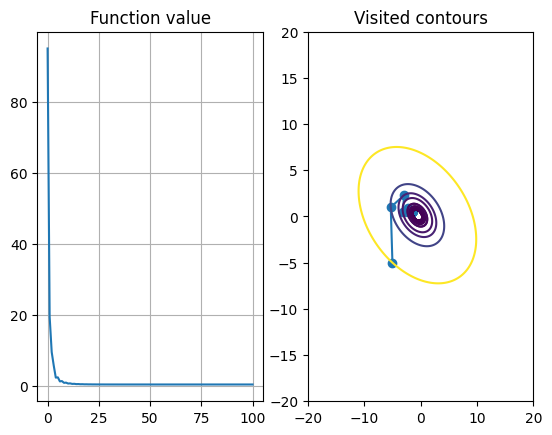

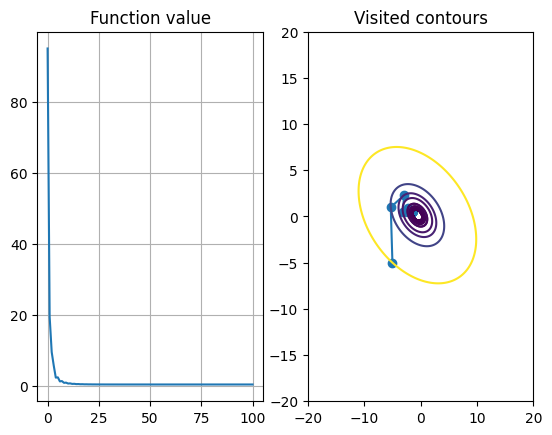

In [41]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi=SearchRegion2d((-20, 20), (-20, 20))

def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x**2 + b * y**2 + c * x*y + d * x + e * y
    return func

def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])
    return func

f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)

def sum_funcs(f, g):
    return lambda x: f(x) + g(x)

#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_with_momentum(0.5)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

